In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import mlab
import matplotlib as mpl
import geopandas as gpd
import numpy as np


In [ ]:
gdf_shapefile = gpd.read_file('/content/india-polygon.shp')
gdf_shapefile.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [ ]:
df = pd.read_csv('/content/Indian States - Indian States.csv')
df['State'] = df['State'].replace({
    'Andaman And Nicobar': 'Andaman and Nicobar Islands',
    'Dadra And Nagar Haveli': 'Dadra and Nagar Haveli'
})
df.head()

,State,Ratio,0
0,Andaman and Nicobar Islands,963.0,NaN
1,Andhra Pradesh,1045.0,NaN
2,Arunachal Pradesh,997.0,NaN
3,Assam,1012.0,NaN
4,Bihar,1090.0,NaN


In [ ]:
gdf = gdf_shapefile.merge(df, how='outer', left_on='st_nm', right_on='State')

# Fill missing gender ratio values with 'NA'
gdf_new = gdf.drop('id', axis=1)
gdf_new = gdf_new.drop('State', axis=1)
gdf_new = gdf_new.drop('0', axis=1)
gdf_new.columns = ['State', 'geometry','Ratio']

gdf_new['Ratio'].fillna(0, inplace=True)
gdf_new.loc[gdf['Ratio'].isna(), 'Ratio'] = 0

# min(gdf['Ratio'])
gdf.head()

,id,st_nm,geometry,State,Ratio,0
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",Andaman and Nicobar Islands,963.0,NaN
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",Arunachal Pradesh,997.0,NaN
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",Assam,1012.0,NaN
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",Bihar,1090.0,NaN
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",Chandigarh,917.0,NaN


# *This code is specifically for horizontal rounded-edge legend*

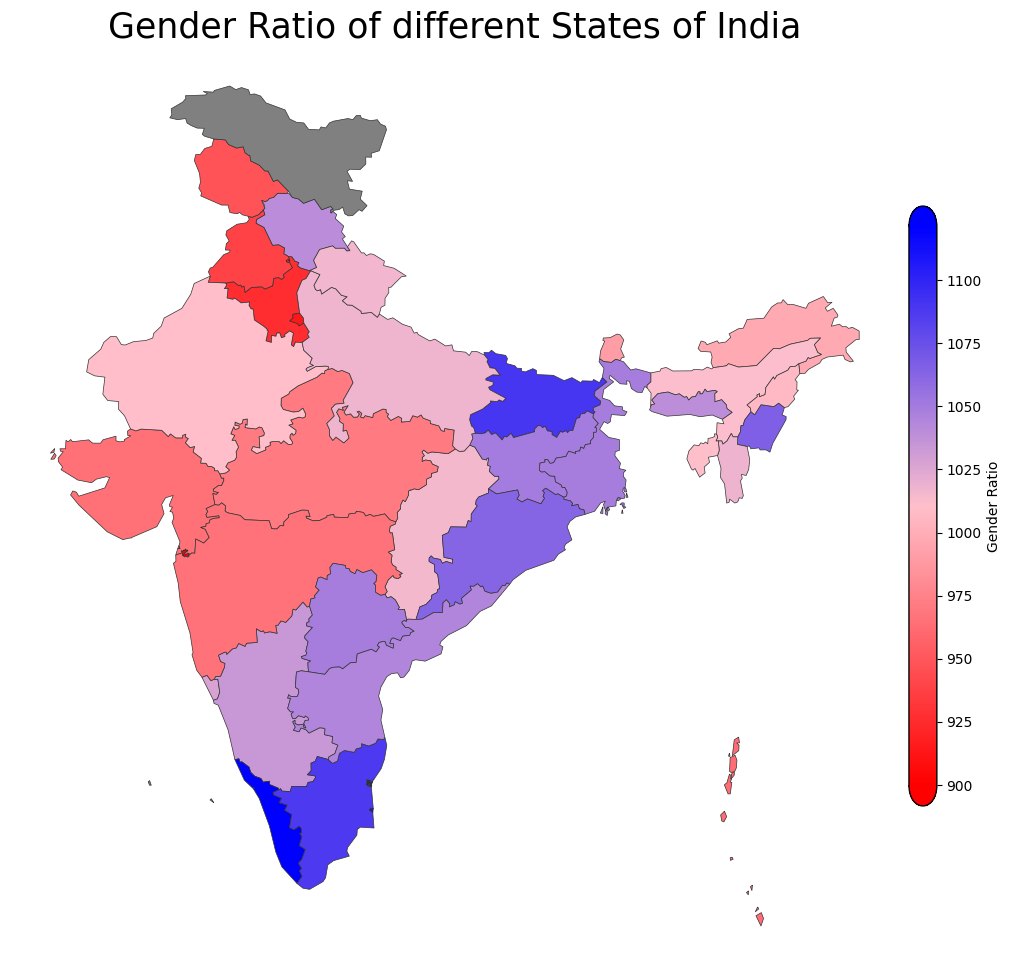

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

# Sample data and preparation (assuming gdf, custom_cmap, norm are defined)
na_color = 'grey'
vmax = 1121
vmin = 900
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', [(0, 'red'), (0.5, 'pink'), (1, 'blue')], N=256)
custom_cmap.set_bad(na_color)

norm = mpl.colors.Normalize(vmax=vmax, vmin=vmin)

fig, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title('Gender Ratio of different States of India', fontdict={'fontsize': 25, 'fontweight': 10, 'color': 'black'}, pad=0.01)

# Create the colorbar
orientation = "vertical"  # Change to "vertical" if needed
colorbar_fraction = 0.03  # Adjust this value to change the length of the colorbar
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=custom_cmap), ax=ax, label='Gender Ratio', orientation=orientation, fraction=colorbar_fraction, pad=0.01)
cb.outline.set_visible(False)

# Extend colorbar
bot = -0.05
top = 1.05

# Upper bound
xy_upper = np.array([[0, 1], [0, top], [1, top], [1, 1]])
if orientation == "horizontal":
    xy_upper = xy_upper[:, ::-1]

color = cb.cmap(cb.norm(cb._values[-1]))
patch_upper = patches.PathPatch(
    mpath.Path(xy_upper, [mpath.Path.MOVETO, mpath.Path.CURVE4, mpath.Path.CURVE4, mpath.Path.CURVE4]),
    facecolor=color,
    linewidth=0,
    antialiased=False,
    transform=cb.ax.transAxes,
    clip_on=False,
)
cb.ax.add_patch(patch_upper)

# Lower bound
xy_lower = np.array([[0, 0], [0, bot], [1, bot], [1, 0]])
if orientation == "horizontal":
    xy_lower = xy_lower[:, ::-1]

color = cb.cmap(cb.norm(cb._values[0]))
patch_lower = patches.PathPatch(
    mpath.Path(xy_lower, [mpath.Path.MOVETO, mpath.Path.CURVE4, mpath.Path.CURVE4, mpath.Path.CURVE4]),
    facecolor=color,
    linewidth=0,
    antialiased=False,
    transform=cb.ax.transAxes,
    clip_on=False,
)
cb.ax.add_patch(patch_lower)

# Outline
xy_outline = np.array([[0, 0], [0, bot], [1, bot], [1, 0], [1, 1], [1, top], [0, top], [0, 1], [0, 0]])
if orientation == "horizontal":
    xy_outline = xy_outline[:, ::-1]

curve = [mpath.Path.MOVETO, mpath.Path.CURVE4, mpath.Path.CURVE4, mpath.Path.CURVE4, mpath.Path.LINETO,
         mpath.Path.CURVE4, mpath.Path.CURVE4, mpath.Path.CURVE4, mpath.Path.LINETO]
path = mpath.Path(xy_outline, curve, closed=True)

patch_outline = patches.PathPatch(
    path, facecolor="None", lw=1, transform=cb.ax.transAxes, clip_on=False
)
cb.ax.add_patch(patch_outline)
ax.axis('off')
# Plot the data (assuming gdf is defined)
gdf.plot(column='Ratio', cmap=custom_cmap, norm=norm, linewidth=0.5, ax=ax, edgecolor='0.2', legend=False, missing_kwds={'color': na_color}, label='Gender Ratio')

plt.show()

## For pointed colorbar edges

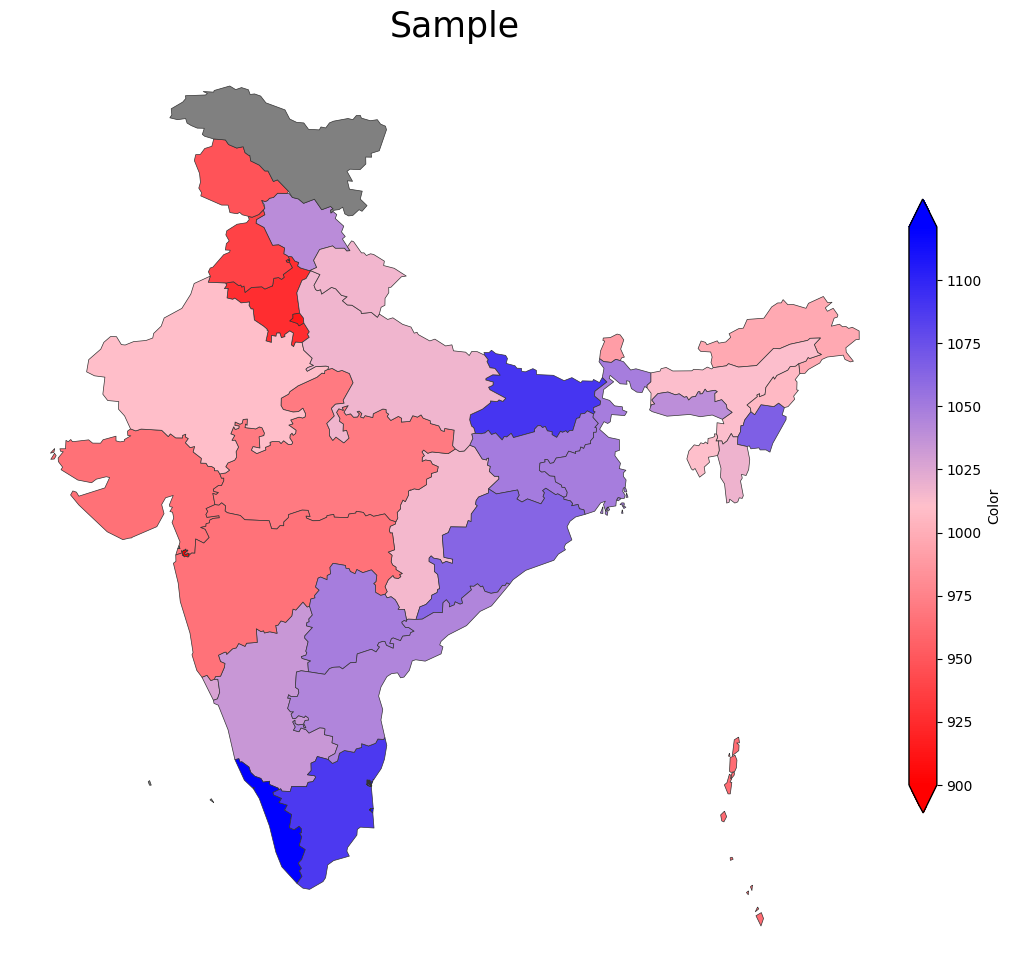

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

# Sample data and preparation (assuming gdf, custom_cmap, norm are defined)
na_color = 'grey'
vmax = 1121
vmin = 900
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', [(0, 'red'), (0.5, 'pink'), (1, 'blue')], N=256)
custom_cmap.set_bad(na_color)

norm = mpl.colors.Normalize(vmax=vmax, vmin=vmin)

fig, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title('Sample', fontdict={'fontsize': 25, 'fontweight': 10, 'color': 'black'}, pad=0.01)

# Create the colorbar
orientation = "vertical"  # Change to "horizontal" if needed
colorbar_fraction = 0.03  # Adjust this value to change the length of the colorbar
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=custom_cmap), ax=ax, label='Color', orientation=orientation, fraction=colorbar_fraction, pad=0.01)
cb.outline.set_visible(False)

# Extend colorbar
bot = -0.05
top = 1.05

# Roundness control variable
roundness_control = 0.01  # Adjust this value to change the roundness

# Upper bound
xy_upper = np.array([
    [0, 1],
    [0.5 - roundness_control, top],
    [0.5 + roundness_control, top],
    [1, 1]
])
if orientation == "horizontal":
    xy_upper = xy_upper[:, ::-1]

color = cb.cmap(cb.norm(cb._values[-1]))
patch_upper = patches.PathPatch(
    mpath.Path(xy_upper, [mpath.Path.MOVETO, mpath.Path.CURVE3, mpath.Path.CURVE3, mpath.Path.LINETO]),
    facecolor=color,
    linewidth=0,
    antialiased=False,
    transform=cb.ax.transAxes,
    clip_on=False,
)
cb.ax.add_patch(patch_upper)

# Lower bound
xy_lower = np.array([
    [0, 0],
    [0.5 - roundness_control, bot],
    [0.5 + roundness_control, bot],
    [1, 0]
])
if orientation == "horizontal":
    xy_lower = xy_lower[:, ::-1]

color = cb.cmap(cb.norm(cb._values[0]))
patch_lower = patches.PathPatch(
    mpath.Path(xy_lower, [mpath.Path.MOVETO, mpath.Path.CURVE3, mpath.Path.CURVE3, mpath.Path.LINETO]),
    facecolor=color,
    linewidth=0,
    antialiased=False,
    transform=cb.ax.transAxes,
    clip_on=False,
)
cb.ax.add_patch(patch_lower)

# Outline
xy_outline = np.array([
    [0, 0],
    [0.5 - roundness_control, bot],
    [0.5 + roundness_control, bot],
    [1, 0],
    [1, 1],
    [0.5 + roundness_control, top],
    [0.5 - roundness_control, top],
    [0, 1],
    [0, 0]
])
if orientation == "horizontal":
    xy_outline = xy_outline[:, ::-1]

curve = [mpath.Path.MOVETO, mpath.Path.CURVE3, mpath.Path.CURVE3, mpath.Path.LINETO, mpath.Path.LINETO, mpath.Path.CURVE3, mpath.Path.CURVE3, mpath.Path.LINETO, mpath.Path.LINETO]
path = mpath.Path(xy_outline, curve, closed=True)

patch_outline = patches.PathPatch(
    path, facecolor="None", lw=1, transform=cb.ax.transAxes, clip_on=False
)
cb.ax.add_patch(patch_outline)
ax.axis('off')
# Plot the data (assuming gdf is defined)
gdf.plot(column='Ratio', cmap=custom_cmap, norm=norm, linewidth=0.5, ax=ax, edgecolor='0.2', legend=False, missing_kwds={'color': na_color}, label='Gender Ratio')

plt.show()
